# Experimentos baseados em Deep Learning

- Utilizando cada paredão como teste e avaliando com holdout.

In [2]:
import pandas as pd 
import numpy as np 
from regression_utils import *
import fastai
from fastai.tabular import *

In [4]:
NORMALIZE = False
EPOCHS = 30
LAYERS = [20, 20]
LR = 1e-2
DEVICE="TODO"

In [6]:
summary_df = pd.DataFrame(columns=COLUMNS)

# Paredao 1

In [8]:
train_df, test_df = get_train_test(1, normalize=NORMALIZE)

In [10]:
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594


In [12]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [14]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [16]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.037753,0.075955,0.075955,00:00
1,0.065966,0.095074,0.095074,00:00
2,0.061884,0.093312,0.093312,00:00
3,0.060852,0.092133,0.092133,00:00
4,0.066856,0.058178,0.058178,00:00
5,0.065342,0.092636,0.092636,00:00
6,0.067287,0.106136,0.106136,00:00
7,0.067380,0.127992,0.127992,00:00
8,0.067877,0.135789,0.135789,00:00
9,0.067173,0.090520,0.090520,00:00


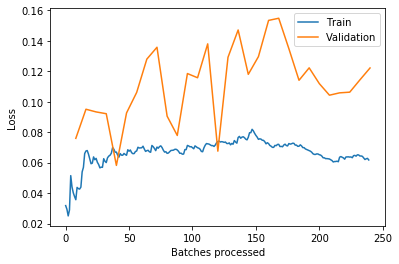

In [18]:
learner.recorder.plot_losses()

In [20]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [22]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [24]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
25,1,lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594,0.435439
24,1,bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446,0.051176


# Paredao 2

In [26]:
train_df, test_df = get_train_test(2, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863


In [28]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [30]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [32]:
learner.fit_one_cycle(EPOCHS, LR)


epoch,train_loss,valid_loss,mean_squared_error,time
0,0.087201,0.013182,0.013182,00:00
1,0.075089,0.011023,0.011023,00:00
2,0.081923,0.043553,0.043553,00:00
3,0.080259,0.028356,0.028356,00:00
4,0.073438,0.020410,0.020410,00:00
5,0.076417,0.005714,0.005714,00:00
6,0.075257,0.009773,0.009773,00:00
7,0.080182,0.033306,0.033306,00:00
8,0.080268,0.030269,0.030269,00:00
9,0.085823,0.056316,0.056316,00:00


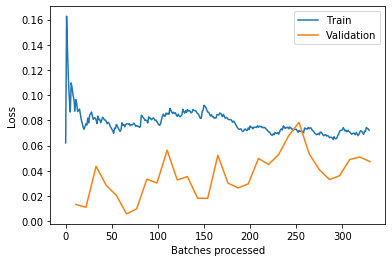

In [34]:
learner.recorder.plot_losses()

In [36]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [38]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [40]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
21,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,0.356915
23,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,0.286121
22,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.058399
20,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,-0.087799


# Paredao 3

In [42]:
train_df, test_df = get_train_test(3, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971


In [44]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [46]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [48]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.070685,0.019240,0.019240,00:00
1,0.063945,0.011966,0.011966,00:00
2,0.075609,0.025145,0.025145,00:00
3,0.071919,0.016437,0.016437,00:00
4,0.070683,0.037225,0.037225,00:00
5,0.075339,0.011497,0.011497,00:00
6,0.074291,0.025513,0.025513,00:00
7,0.079458,0.011530,0.011530,00:00
8,0.082637,0.013506,0.013506,00:00
9,0.075790,0.020056,0.020056,00:00


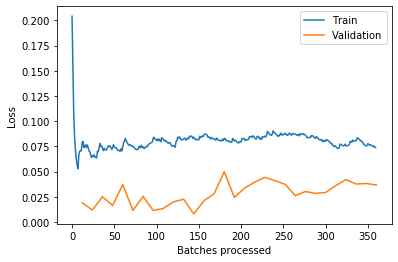

In [50]:
learner.recorder.plot_losses()

In [52]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [54]:

test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [56]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
10,3,hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971,0.365190
9,3,felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029,0.313331


# Paredao 4

In [58]:
train_df, test_df = get_train_test(4, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
26,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130
27,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608
28,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262


In [60]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [62]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.078853,0.149825,0.149825,00:00
1,0.068325,0.076274,0.076274,00:00
2,0.057064,0.070060,0.070060,00:00
3,0.064552,0.066762,0.066762,00:00
4,0.057939,0.063638,0.063638,00:00
5,0.060971,0.086034,0.086034,00:00
6,0.073812,0.098419,0.098419,00:00
7,0.072015,0.055719,0.055719,00:00
8,0.073271,0.044279,0.044279,00:00
9,0.077743,0.020840,0.020840,00:00


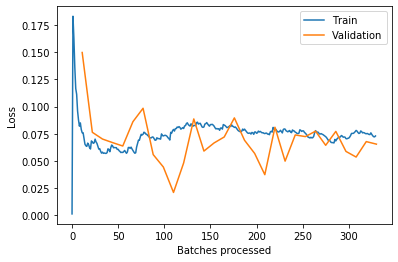

In [64]:
learner.recorder.plot_losses()

In [66]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [68]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [70]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
26,4,babu,6766,10814,18799,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,15505,2603,614605,87114,325345,0.0130,0.458427
27,4,victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,4229,1272,259802,43392,14399,0.3608,0.405318
28,4,lucas,12173,17964,31523,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,22154,7283,1337004,250861,23670,0.6262,0.404738


# Paredao 5

In [72]:
train_df, test_df = get_train_test(5, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927


In [74]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [76]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.066867,0.093778,0.093778,00:00
1,0.068932,0.102111,0.102111,00:00
2,0.068750,0.075852,0.075852,00:00
3,0.068001,0.071750,0.071750,00:00
4,0.071528,0.065845,0.065845,00:00
5,0.076091,0.073289,0.073289,00:00
6,0.077160,0.074330,0.074330,00:00
7,0.078865,0.068852,0.068852,00:00
8,0.078631,0.086617,0.086617,00:00
9,0.083017,0.070575,0.070575,00:00


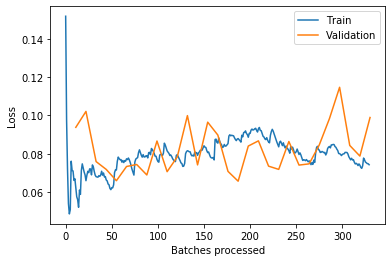

In [78]:
learner.recorder.plot_losses()

In [80]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [82]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [84]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
5,5,felipe_prior,4887,9452,19076,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,21636,8678,703621,137701,204031,0.2927,0.442685
3,5,bianca_andrade,4239,8067,6802,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,10238,6872,136880,18673,411880,0.5309,0.353351
4,5,flayslene,2304,4170,6222,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,7920,2841,244036,42579,104138,0.1764,0.195423


# Paredao 6

In [86]:
train_df, test_df = get_train_test(6, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329


In [88]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [90]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.088484,0.179802,0.179802,00:00
1,0.072989,0.165497,0.165497,00:00
2,0.076586,0.129618,0.129618,00:00
3,0.076129,0.151369,0.151369,00:00
4,0.072159,0.134381,0.134381,00:00
5,0.067264,0.122303,0.122303,00:00
6,0.071294,0.160378,0.160378,00:00
7,0.068958,0.143034,0.143034,00:00
8,0.072780,0.201902,0.201902,00:00
9,0.069615,0.200232,0.200232,00:00


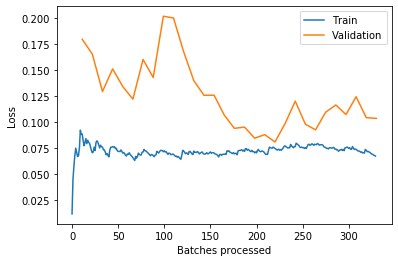

In [92]:
learner.recorder.plot_losses()

In [94]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [96]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [98]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
1,6,guilherme,15623,26030,61087,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,35276,18026,2623616,513321,103421,0.5607,0.425807
2,6,pyong,24067,31118,59615,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,53242,22590,2790406,500118,1431039,0.4329,0.223805
0,6,gizelly_bicalho,20697,18318,14428,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,23543,8996,2513041,427327,234977,0.0064,0.187671


# Paredao 7

In [100]:
train_df, test_df = get_train_test(7, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522


In [102]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [104]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.059189,0.072305,0.072305,00:00
1,0.064474,0.066094,0.066094,00:00
2,0.069311,0.056715,0.056715,00:00
3,0.067648,0.055867,0.055867,00:00
4,0.067727,0.061194,0.061194,00:00
5,0.071506,0.075837,0.075837,00:00
6,0.071657,0.178994,0.178994,00:00
7,0.073869,0.195836,0.195836,00:00
8,0.074228,0.237231,0.237231,00:00
9,0.070365,0.165759,0.165759,00:00


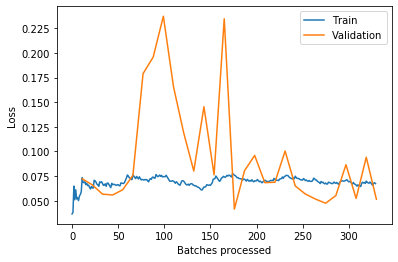

In [106]:
learner.recorder.plot_losses()

In [108]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [110]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [112]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
6,7,babu,14706,13814,17650,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,20262,6864,3245989,421069,325345,0.0460,0.503170
8,7,victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,9331,4611,1370088,192649,14399,0.8522,0.435008
7,7,manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,15830,5426,1347551,161381,4327060,0.1018,0.172232



# Paredao 8

In [114]:
train_df, test_df = get_train_test(8, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170


In [116]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [118]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.081106,0.071132,0.071132,00:00
1,0.069852,0.058802,0.058802,00:00
2,0.070629,0.073081,0.073081,00:00
3,0.078018,0.067121,0.067121,00:00
4,0.077363,0.055948,0.055948,00:00
5,0.074438,0.051347,0.051347,00:00
6,0.076546,0.060895,0.060895,00:00
7,0.070043,0.037068,0.037068,00:00
8,0.071259,0.013210,0.013210,00:00
9,0.072603,0.049716,0.049716,00:00


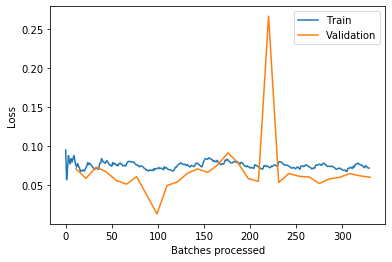

In [120]:
learner.recorder.plot_losses()

In [122]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [124]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [126]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
19,8,pyong,23320,37894,49091,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,46841,20990,1884395,331018,1431039,0.5170,2.304154
18,8,rafa,11365,16307,33927,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,22837,11700,833006,65329,293473,0.0059,0.213155
17,8,babu,20043,24848,39041,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,36583,18247,2746925,442326,325345,0.4771,0.188207


# Paredão 9

In [128]:
train_df, test_df = get_train_test(9, normalize=NORMALIZE)
test_df


,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964


In [130]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [132]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.093180,0.061043,0.061043,00:00
1,0.078332,0.084846,0.084846,00:00
2,0.086661,0.066799,0.066799,00:00
3,0.090515,0.081561,0.081561,00:00
4,0.084576,0.109511,0.109511,00:00
5,0.083592,0.039388,0.039388,00:00
6,0.079016,0.069623,0.069623,00:00
7,0.083886,0.070033,0.070033,00:00
8,0.086037,0.068703,0.068703,00:00
9,0.095133,0.045042,0.045042,00:00


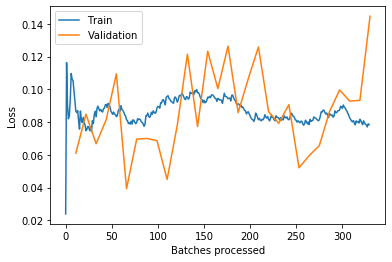

In [134]:
learner.recorder.plot_losses()

In [136]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [138]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [140]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
14,9,daniel,17050,28476,35449,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,24967,12346,2362234,451548,33876,0.8082,0.488572
16,9,ivy,12919,19342,24191,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,16734,4883,1801001,319531,59125,0.0964,0.462122
15,9,flayslene,18049,20419,29529,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,41155,12832,2048527,340506,104138,0.0954,0.395615


# Paredão 10

In [142]:
train_df, test_df = get_train_test(10, normalize=NORMALIZE)
test_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673


In [144]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [146]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.060999,0.065579,0.065579,00:00
1,0.064464,0.082137,0.082137,00:00
2,0.068098,0.081761,0.081761,00:00
3,0.068184,0.071948,0.071948,00:00
4,0.073189,0.064675,0.064675,00:00
5,0.073678,0.064950,0.064950,00:00
6,0.073615,0.045804,0.045804,00:00
7,0.084806,0.019238,0.019238,00:00
8,0.081666,0.045325,0.045325,00:00
9,0.088595,0.086682,0.086682,00:00


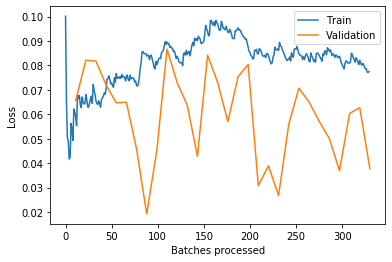

In [148]:
learner.recorder.plot_losses()

In [150]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [152]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [154]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
11,10,manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,6621309,989025,4785334,0.4251,3.437876
13,10,felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,6664432,1291988,642881,0.5673,1.196664
12,10,mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,967975,131232,269733,0.0076,0.181618


# Sumarizando

In [156]:
summary_df

,paredao,nome,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao,predicao
0,1,bianca_andrade,5102,5230,3762,0.361998,0.371080,0.266922,0.483052,0.326345,0.207010,5849,5903,2342,407879,57730,411880,0.2446,0.051176
1,1,lucas_chumbo,5460,10796,14411,0.178042,0.352040,0.469919,0.516948,0.673655,0.792990,22759,5502,2406,667691,132858,12014,0.7594,0.435439
2,1,bianca_andrade,5102,5230,3762,0.361998,0.371080,0.266922,0.483052,0.326345,0.207010,5849,5903,2342,407879,57730,411880,0.2446,0.051176
3,1,lucas_chumbo,5460,10796,14411,0.178042,0.352040,0.469919,0.516948,0.673655,0.792990,22759,5502,2406,667691,132858,12014,0.7594,0.435439
4,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,-0.087799
5,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,0.356915
6,2,pyong,19947,15248,12907,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,28745,6830,1889184,357422,1431039,0.0066,0.058399
7,2,hadson,14732,30837,54056,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,68537,5825,2416937,583604,10207,0.1863,0.286121
8,2,babu,3819,5049,3822,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,6016,1068,313738,57539,325345,0.0044,-0.087799
9,2,petrix,17850,41331,62584,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,64815,10271,3036821,776919,22414,0.8027,0.356915
